# 1. **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# **2. Memuat Dataset dari Hasil Clustering**

In [2]:
df = pd.read_csv('Dataset_Klasifikasi.csv')

In [3]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0.0,0.0,67.0,2.0,124670.0,1.0,2.0,0
1,1.0,1.0,22.0,1.0,150773.0,1.0,2.0,8
2,0.0,0.0,49.0,1.0,89210.0,0.0,0.0,3
3,0.0,0.0,45.0,1.0,171565.0,1.0,1.0,7
4,0.0,0.0,53.0,1.0,149031.0,1.0,1.0,7
...,...,...,...,...,...,...,...,...
1953,1.0,0.0,47.0,1.0,123525.0,0.0,0.0,4
1954,1.0,1.0,27.0,1.0,117744.0,1.0,0.0,1
1955,0.0,0.0,31.0,0.0,86400.0,0.0,0.0,3
1956,1.0,1.0,24.0,1.0,97968.0,0.0,0.0,9


# **3. Data Splitting**

In [4]:
# pisahkan fitur (X) dan target (y)
X = df.drop(columns=["Cluster"])
y = df["Cluster"]

In [5]:
# bagi dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**

## **a. Membangun Model Klasifikasi**

In [6]:
# inisialisasi dan latih model dengan model Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features="sqrt", min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [7]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

## **b. Evaluasi Model Klasifikasi**

In [8]:
# akurasi dan f1 score
print("Akurasi:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred, average="weighted"))

Akurasi: 0.9974489795918368
F1-Score: 0.9974442091001898


In [11]:
# prediksi pada data latih
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# prediksi pada data uji
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Akurasi Data Latih: {train_acc}")
print(f"Akurasi Data Uji  : {test_acc}")


Akurasi Data Latih: 0.9980842911877394
Akurasi Data Uji  : 0.9974489795918368


In [12]:
# f1 score untuk data latih dan uji
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"F1-Score Data Latih: {train_f1}")
print(f"F1-Score Data Uji  : {test_f1}")


F1-Score Data Latih: 0.9980847029969826
F1-Score Data Uji  : 0.9974442091001898


In [9]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        23
           3       0.98      1.00      0.99        46
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        33
           7       1.00      0.97      0.99        35
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        50

    accuracy                           1.00       392
   macro avg       1.00      1.00      1.00       392
weighted avg       1.00      1.00      1.00       392



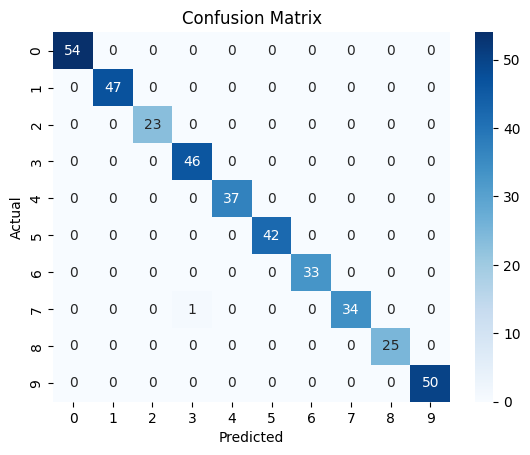

In [10]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
# cross validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")


Cross-validation scores: [0.99681529 0.99361022 0.98083067 0.99680511 0.98722045]
Mean CV Accuracy: 0.991056348059665


## **c. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Analisis Hasil Evaluasi Model Klasifikasi**

**1. Akurasi dan F1-score Sangat Tinggi**
- **Akurasi Data Latih**: 99.81%
- **Akurasi Data Uji**: 99.74%
- **F1-score Data Latih**: 99.81%
- **F1-score Data Uji**: 99.74%
- Model memiliki performa sangat baik dalam klasifikasi dengan sedikit kesalahan.

**2. Confusion Matrix dan Evaluasi Kelas**
- Hampir semua kelas diprediksi dengan benar, hanya terdapat satu kesalahan pada kelas 7.
- Precision dan recall untuk semua kelas mendekati 1.00.

**3. Stabilitas Model dengan Cross-Validation**
- **Cross-validation scores**: [0.9968, 0.9936, 0.9808, 0.9968, 0.9872]
- **Mean CV Accuracy**: 99.11%
- Hasil ini menunjukkan model tetap konsisten pada berbagai subset data.

**4. Kemungkinan Overfitting**
- Akurasi training dan testing sangat tinggi dan hampir sama.
- Cross-validation menunjukkan skor sedikit lebih rendah, sehingga ada kemungkinan model terlalu menyesuaikan diri dengan data latih.

---

**Rekomendasi Tindakan Lanjutan**

**1. Validasi dengan Data Baru**
- Ujikan model pada data nyata yang belum pernah terlihat sebelumnya untuk mengukur generalisasi.

**2. Eksperimen dengan Model Lain**
- Coba model lain seperti XGBoost atau SVM untuk melihat apakah performa bisa lebih stabil terhadap data baru.